In [141]:
# !pip install sklearn
# !pip install featuretools
# !pip install lightgbm

     |████████████████████████████████| 1.0 MB 4.8 MB/s eta 0:00:01


In [143]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score, train_test_split
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# 機械学習関連のライブラリ群

from sklearn.metrics import confusion_matrix # 混合行列

from sklearn.decomposition import PCA #主成分分析
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.neighbors import KNeighborsClassifier # K近傍法
from sklearn.svm import SVC # サポートベクターマシン
from sklearn.tree import DecisionTreeClassifier # 決定木
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
from sklearn.naive_bayes import GaussianNB # ナイーブ・ベイズ

import lightgbm as lgb

OSError: dlopen(/Users/kennakai/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/kennakai/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [82]:
train_df = pd.read_csv("train.csv")
test_X = pd.read_csv("test.csv")

In [83]:
train_df.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,59,Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,69,Male,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,65,Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,65,Male,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,22,Female,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0


In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       850 non-null    int64  
 1   Gender    850 non-null    object 
 2   T_Bil     850 non-null    float64
 3   D_Bil     850 non-null    float64
 4   ALP       850 non-null    float64
 5   ALT_GPT   850 non-null    float64
 6   AST_GOT   850 non-null    float64
 7   TP        850 non-null    float64
 8   Alb       850 non-null    float64
 9   AG_ratio  850 non-null    float64
 10  disease   850 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 73.2+ KB


# train_yに目的変数を代入

In [85]:
train_y = train_df['disease']

In [86]:
test_X.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,25,Male,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006
1,26,Female,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562
2,64,Male,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579
3,65,Male,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070
4,34,Female,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078


In [87]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       350 non-null    int64  
 1   Gender    350 non-null    object 
 2   T_Bil     350 non-null    float64
 3   D_Bil     350 non-null    float64
 4   ALP       350 non-null    float64
 5   ALT_GPT   350 non-null    float64
 6   AST_GOT   350 non-null    float64
 7   TP        350 non-null    float64
 8   Alb       350 non-null    float64
 9   AG_ratio  350 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 27.5+ KB


In [88]:
print(test_X.Age.min(), test_X.Age.max())

6 75


In [89]:
print(train_df.Age.min(), train_df.Age.max())

10 78


In [90]:
test_X.Age = pd.cut(test_X.Age, [0, 10, 20, 30,40,50,60,70,80])

In [91]:
test_X

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,"(20, 30]",Male,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006
1,"(20, 30]",Female,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562
2,"(60, 70]",Male,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579
3,"(60, 70]",Male,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070
4,"(30, 40]",Female,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078
...,...,...,...,...,...,...,...,...,...,...
345,"(60, 70]",Female,0.913867,0.120555,214.354728,16.964820,28.723677,6.960649,3.505619,1.224655
346,"(50, 60]",Male,0.818573,0.206075,215.898729,14.733461,20.470517,7.531071,3.637508,1.282833
347,"(20, 30]",Male,0.787054,0.186129,214.167523,14.936585,20.589993,7.505128,3.619033,1.287256
348,"(60, 70]",Male,0.725194,0.191307,220.272862,17.532595,48.115014,7.559414,3.635871,1.263348


In [92]:
train_df.Age = pd.cut(train_df.Age, [0, 10, 20, 30,40,50,60,70,80])
train_df

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,"(50, 60]",Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,"(60, 70]",Male,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,"(60, 70]",Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,"(60, 70]",Male,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,"(20, 30]",Female,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0
...,...,...,...,...,...,...,...,...,...,...,...
845,"(20, 30]",Male,0.767450,0.186467,215.656126,13.963269,20.160997,6.824975,3.622443,1.297731,0
846,"(50, 60]",Male,0.867946,0.156997,213.810275,14.564305,20.122535,7.509893,3.619143,1.296843,0
847,"(40, 50]",Male,0.826785,0.138898,230.340081,40.495102,49.620857,7.529840,3.724408,0.987033,1
848,"(30, 40]",Female,0.761972,0.137969,214.170393,18.048321,54.447774,5.944855,3.150978,1.220787,0


In [93]:
# data_Xに説明変数を代入
train_X = train_df.drop('disease', axis=1)

In [94]:
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)

In [95]:
train_X.head()

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,"Age_(0, 10]","Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]","Age_(70, 80]",Gender_Female,Gender_Male
0,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0,0,0,0,0,1,0,0,0,1
1,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,0,0,0,0,0,0,1,0,0,1
2,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0,0,0,0,0,0,1,0,0,1
3,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,0,0,0,0,0,0,1,0,0,1
4,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0,0,1,0,0,0,0,0,1,0


In [96]:
test_X.head()

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,"Age_(0, 10]","Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]","Age_(70, 80]",Gender_Female,Gender_Male
0,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006,0,0,1,0,0,0,0,0,0,1
1,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562,0,0,1,0,0,0,0,0,1,0
2,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579,0,0,0,0,0,0,1,0,0,1
3,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070,0,0,0,0,0,0,1,0,0,1
4,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078,0,0,0,1,0,0,0,0,1,0


In [106]:
# 訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, random_state=0)

In [107]:
# lr = LinearRegression()
lr = LogisticRegression(max_iter=2000) # ロジスティック回帰モデルのインスタンスを作成
# X = boston_df.values         # 説明変数（Numpyの配列）
# Y = boston_df['MEDV'].values         # 目的変数（Numpyの配列）

In [108]:
# テストセットでモデルを評価
loo = LeaveOneOut()
# score = cross_val_score(lr, train_X, train_y, cv=loo)
score = cross_val_score(lr, train_X, train_y, cv=5)
score.mean()

0.8317647058823529

In [109]:
lr.fit(train_X, train_y)

LogisticRegression(max_iter=2000)

In [110]:
# 評価用データの予測
pred_y_lr = lr.predict(test_X)

# 予測結果の表示
print(pred_y_lr)

[0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1
 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0]


In [123]:
names = ["Logistic Regression", "Nearest Neighbors", 
         "Linear SVM", "Polynomial SVM", "RBF SVM", "Sigmoid SVM", 
         "Decision Tree","Random Forest", "AdaBoost", "Naive Bayes"]

classifiers = [
    LogisticRegression(max_iter=3000),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="poly"),
    SVC(kernel="rbf"),
    SVC(kernel="sigmoid"),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB()]

In [124]:
result = []
for name, clf in zip(names, classifiers): # 指定した複数の分類機を順番に呼び出す
    clf.fit(train_X, train_y) # 学習
    score1 = clf.score(train_X, train_y) # 正解率（train）の算出
    score2 = clf.score(train_X, train_y) # 正解率（test）の算出
    result.append([score1, score2]) # 結果の格納

# test の正解率の大きい順に並べる
df_result = pd.DataFrame(result, columns=['train', 'test'], index=names).sort_values('test', ascending=False)
# もし上のコードが動かない場合、以下のコーを試してみてください。
#df_result = pd.DataFrame(result, columns=['train', 'test'], index=names).sort_values('test', ascending=False)

In [125]:
df_result

,train,test
Decision Tree,1.000000,1.000000
Random Forest,1.000000,1.000000
AdaBoost,0.908235,0.908235
Nearest Neighbors,0.867059,0.867059
Linear SVM,0.850588,0.850588
Logistic Regression,0.849412,0.849412
Naive Bayes,0.801176,0.801176
RBF SVM,0.772941,0.772941
Sigmoid SVM,0.725882,0.725882
Polynomial SVM,0.687059,0.687059


<AxesSubplot:>

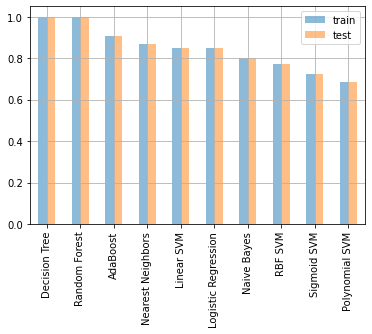

In [126]:
# 棒グラフの描画
df_result.plot(kind='bar', alpha=0.5, grid=True)

In [127]:
result = []
for trial in range(20): # 20 回繰り返す
    X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=.4) # 訓練データ・テストデータの生成
    for name, clf in zip(names, classifiers): # 指定した複数の分類機を順番に呼び出す
        clf.fit(X_train, y_train) # 学習
        score1 = clf.score(X_train, y_train) # 正解率（train）の算出
        score2 = clf.score(X_test, y_test) # 正解率（test）の算出
        result.append([name, score1, score2]) # 結果の格納

df_result = pd.DataFrame(result, columns=['classifier', 'train', 'test'])

In [128]:
df_result

,classifier,train,test
0,Logistic Regression,0.852941,0.797059
1,Nearest Neighbors,0.854902,0.773529
2,Linear SVM,0.858824,0.794118
3,Polynomial SVM,0.696078,0.658824
4,RBF SVM,0.756863,0.700000
...,...,...,...
195,Sigmoid SVM,0.666667,0.594118
196,Decision Tree,1.000000,0.776471
197,Random Forest,1.000000,0.867647
198,AdaBoost,0.929412,0.829412


In [130]:
# 分類器 (classifier) 毎にグループ化して正解率の平均を計算し、test の正解率の平均の大きい順に並べる
df_result_mean = df_result.groupby('classifier').mean().sort_values('test', ascending=False)

In [131]:
df_result_mean

,train,test
classifier,,
Random Forest,1.000000,0.860735
Linear SVM,0.846569,0.835588
AdaBoost,0.935784,0.833529
Logistic Regression,0.843039,0.833529
Nearest Neighbors,0.862941,0.802206
Decision Tree,1.000000,0.798824
Naive Bayes,0.797157,0.794265
RBF SVM,0.731373,0.728824
Polynomial SVM,0.666765,0.668235


In [132]:
# エラーバーの表示に用いる目的で、標準偏差を計算する
errors = df_result.groupby('classifier').std()

In [133]:
errors # 結果の確認

,train,test
classifier,,
AdaBoost,0.010643,0.015749
Decision Tree,0.000000,0.016429
Linear SVM,0.015093,0.017567
Logistic Regression,0.011388,0.018365
Naive Bayes,0.010711,0.015519
Nearest Neighbors,0.009955,0.018842
Polynomial SVM,0.018834,0.032523
RBF SVM,0.020722,0.034900
Random Forest,0.000000,0.018112


<AxesSubplot:xlabel='classifier'>

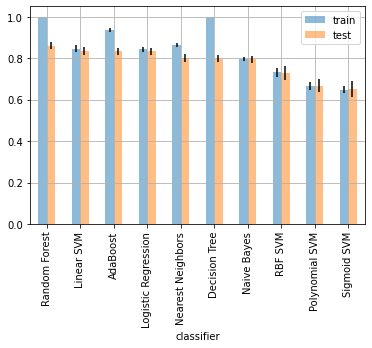

In [134]:
# 平均値と標準偏差を用いて棒グラフを描画
df_result_mean.plot(kind='bar', alpha=0.5, grid=True, yerr=errors)

In [122]:
DTC = DecisionTreeClassifier()
score = cross_val_score(DTC, train_X, train_y, cv=5)
score.mean()

0.7917647058823529

In [135]:
RFC = RandomForestClassifier()
score = cross_val_score(RFC, train_X, train_y, cv=5)
score.mean()

0.8670588235294119

In [136]:
RFC.fit(train_X, train_y)
# 評価用データの予測
pred_y = RFC.predict(test_X)

# 予測結果の表示
print(pred_y)

[0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0
 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1
 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0
 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0
 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1]


In [111]:
# 評価用データの予測
# pred_y1 = tree.predict(test_X)
# 予測結果の表示
# print(pred_y1)

In [137]:
submit = pd.read_csv("sample_submit.csv", header=None)

In [138]:
submit[1] = pred_y

In [139]:
submit.to_csv("submit.csv", index=False, header=False)